In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn theme for better visuals
sns.set_theme(style="whitegrid", context="notebook")
plt.rcParams['figure.figsize'] = (10, 6)

# Path to your JSON file
file_path = 'house_price.json'

# Load the JSON data
with open(file_path, 'r', encoding='utf-8') as f:
    raw_data = json.load(f)

# Convert to DataFrame
df = pd.DataFrame(raw_data)

# Print the basic information about the dataset
print("✓ Data loaded successfully")
print(f"\nDataset shape: {df.shape}")
print(f"Number of rows (samples): {df.shape[0]}")
print(f"Number of columns (features): {df.shape[1]}")
print(f"\nDataset dimensions: {df.shape}")

# Display the first few rows as a table
print(df.head())


✓ Data loaded successfully

Dataset shape: (4505, 24)
Number of rows (samples): 4505
Number of columns (features): 24

Dataset dimensions: (4505, 24)
  main_property_description_text_content_original_text  main_property_floor  \
0  | Përshkrimi i apartamentit:\n\n♦Sallon i boll...                    2.0   
1  Description\t\n\t\t\n\t\t\n\t\t\t\nShitet apar...                    7.0   
2  SHITET  APARTAMENT \n•2+1\n•SIPERFAQE TOTALE 8...                    5.0   
3  Apartament me Tipologji: 1+1\n\nLokacioni: Miv...                    3.0   
4  Shitet Super Apartament 1+1 në Don Bosko! Gjen...                    7.0   

  main_property_furnishing_status main_property_has_carport  \
0                 fully_furnished                      None   
1                            None                      True   
2                            None                      None   
3                            None                      None   
4                 fully_furnished                      None 

In [2]:
# Display detailed information about the dataset
print("="*60)
print("DATASET INFORMATION")
print("="*60)
df.info()

DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4505 entries, 0 to 4504
Data columns (total 24 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   main_property_description_text_content_original_text  4505 non-null   object 
 1   main_property_floor                                   4256 non-null   float64
 2   main_property_furnishing_status                       2854 non-null   object 
 3   main_property_has_carport                             284 non-null    object 
 4   main_property_has_elevator                            2750 non-null   object 
 5   main_property_has_garage                              357 non-null    object 
 6   main_property_has_garden                              187 non-null    object 
 7   main_property_has_parking_space                       284 non-null    object 
 8   main_property_has_terrace             

In [3]:
# Generate descriptive statistics for numerical features
print("="*60)
print("STATISTICAL SUMMARY - NUMERICAL FEATURES")
print("="*60)
print(df.describe())

print("\n" + "="*60)
print("STATISTICAL SUMMARY - ALL FEATURES (including categorical)")
print("="*60)
print(df.describe(include='all'))

STATISTICAL SUMMARY - NUMERICAL FEATURES
       main_property_floor  main_property_location_lat  \
count          4256.000000                 4505.000000   
mean              4.400846                   41.289689   
std               3.122044                    1.395597   
min              -1.000000                    0.000000   
25%               2.000000                   41.319974   
50%               4.000000                   41.330760   
75%               6.000000                   41.340012   
max              36.000000                   50.143776   

       main_property_location_lng  main_property_price  \
count                 4505.000000         4.505000e+03   
mean                    19.786343         2.829537e+05   
std                      0.675789         3.666449e+06   
min                      0.000000         0.000000e+00   
25%                     19.796175         1.050000e+05   
50%                     19.811132         1.485000e+05   
75%                     19.826

In [4]:
# Check for missing values in the dataset
print("="*60)
print("MISSING VALUES ANALYSIS")
print("="*60)

missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Count': missing_values.values,
    'Missing_Percentage': missing_percentage.values
})

missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    print("\nColumns with missing values:")
    print(missing_df.to_string(index=False))
else:
    print("\n✓ No missing values found in the dataset!")

print(f"\nTotal missing values: {df.isnull().sum().sum()}")

MISSING VALUES ANALYSIS

Columns with missing values:
                                         Column  Missing_Count  Missing_Percentage
                       main_property_has_garden           4318           95.849057
                      main_property_has_carport           4221           93.695893
                main_property_has_parking_space           4221           93.695893
                       main_property_has_garage           4148           92.075472
                      main_property_has_terrace           3997           88.723640
                     main_property_has_elevator           1755           38.956715
                main_property_furnishing_status           1651           36.648169
                            main_property_floor            249            5.527192
   main_property_property_composition_balconies             36            0.799112
   main_property_property_composition_bathrooms             36            0.799112
    main_property_property_compos

In [5]:
# Separate numerical and categorical columns for analysis
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("="*60)
print("COLUMN TYPES")
print("="*60)
print(f"\nNumerical columns ({len(numerical_cols)}):")
print(numerical_cols)
print(f"\nCategorical columns ({len(categorical_cols)}):")
print(categorical_cols)

COLUMN TYPES

Numerical columns (11):
['main_property_floor', 'main_property_location_lat', 'main_property_location_lng', 'main_property_price', 'main_property_property_composition_balconies', 'main_property_property_composition_bathrooms', 'main_property_property_composition_bedrooms', 'main_property_property_composition_kitchens', 'main_property_property_composition_living_rooms', 'price_in_euro', 'main_property_property_square']

Categorical columns (13):
['main_property_description_text_content_original_text', 'main_property_furnishing_status', 'main_property_has_carport', 'main_property_has_elevator', 'main_property_has_garage', 'main_property_has_garden', 'main_property_has_parking_space', 'main_property_has_terrace', 'main_property_location_city_zone_city_city_name', 'main_property_location_city_zone_formatted_address', 'main_property_price_currency', 'main_property_property_status', 'main_property_property_type']


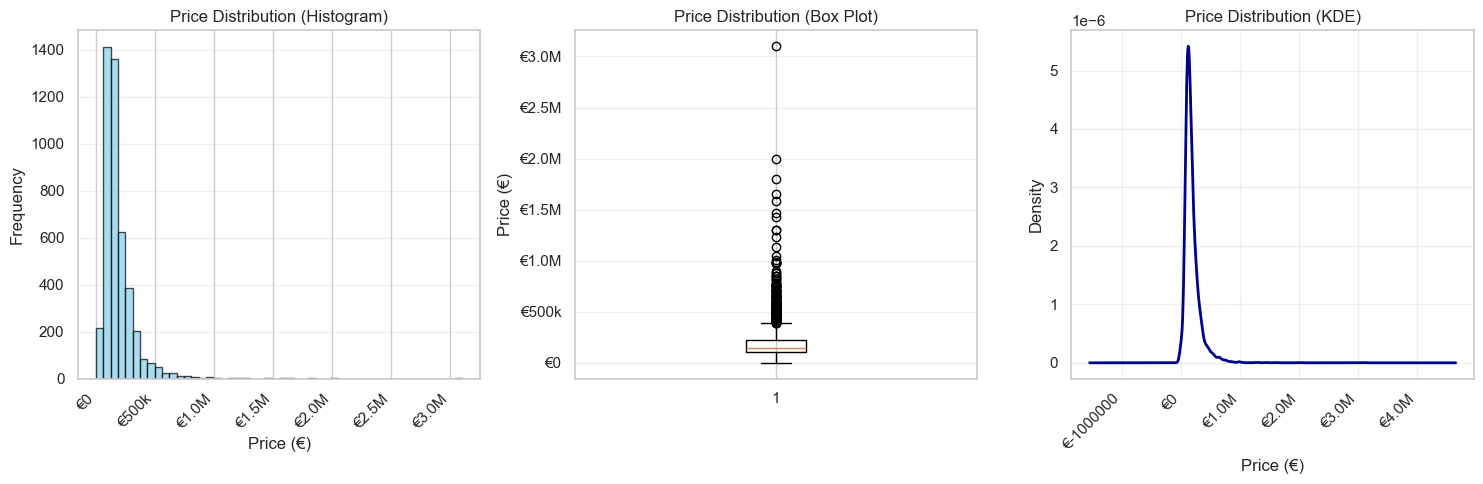

PRICE STATISTICS
Mean:    €184.5k (184,524)
Median:  €148.0k (148,000)
Std Dev: €144.7k (144,716)
Min:     €67.00
Max:     €3.10M (3,100,000)
Skewness: 4.98
Kurtosis: 57.46

PRICE RANGE DISTRIBUTION
price_range
<€100k        1022
€100k-200k    2160
€200k-300k     779
€300k-400k     284
€400k-500k     119
€500k-750k     107
€750k-1M        21
>€1M            13
Name: count, dtype: int64


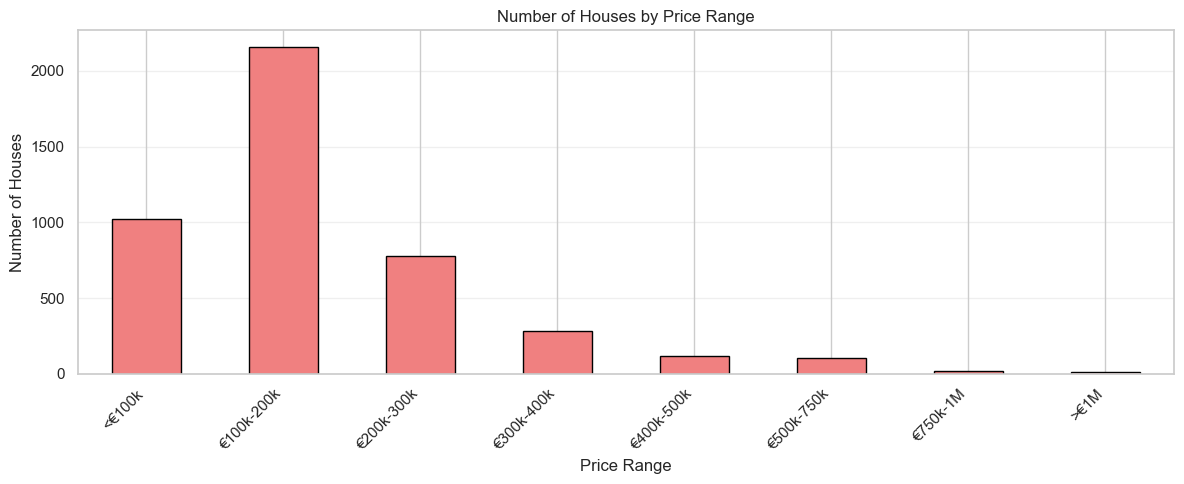

In [6]:
# ============================================================================
# CELL 8: Price Distribution Analysis (with proper Euro formatting)
# ============================================================================

# Function to format large numbers
def format_euro(value, pos=None):
    """Format values as k (thousands) or M (millions)"""
    if value >= 1_000_000:
        return f'€{value/1_000_000:.1f}M'
    elif value >= 1_000:
        return f'€{value/1_000:.0f}k'
    else:
        return f'€{value:.0f}'

from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(15, 5))

# Histogram
plt.subplot(1, 3, 1)
plt.hist(df['price_in_euro'], bins=50, edgecolor='black', color='skyblue', alpha=0.7)
plt.xlabel('Price (€)')
plt.ylabel('Frequency')
plt.title('Price Distribution (Histogram)')
plt.grid(axis='y', alpha=0.3)
# Format x-axis
ax1 = plt.gca()
ax1.xaxis.set_major_formatter(FuncFormatter(format_euro))
plt.xticks(rotation=45, ha='right')

# Box plot
plt.subplot(1, 3, 2)
bp = plt.boxplot(df['price_in_euro'], vert=True)
plt.ylabel('Price (€)')
plt.title('Price Distribution (Box Plot)')
plt.grid(axis='y', alpha=0.3)
# Format y-axis
ax2 = plt.gca()
ax2.yaxis.set_major_formatter(FuncFormatter(format_euro))

# KDE plot
plt.subplot(1, 3, 3)
df['price_in_euro'].plot(kind='kde', color='darkblue', linewidth=2)
plt.xlabel('Price (€)')
plt.ylabel('Density')
plt.title('Price Distribution (KDE)')
plt.grid(alpha=0.3)
# Format x-axis
ax3 = plt.gca()
ax3.xaxis.set_major_formatter(FuncFormatter(format_euro))
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Statistics with proper Euro formatting
print("="*60)
print("PRICE STATISTICS")
print("="*60)

mean_price = df['price_in_euro'].mean()
median_price = df['price_in_euro'].median()
std_price = df['price_in_euro'].std()
min_price = df['price_in_euro'].min()
max_price = df['price_in_euro'].max()

# Helper function for nice printing
def format_price_text(value):
    if value >= 1_000_000:
        return f"€{value/1_000_000:.2f}M ({value:,.0f})"
    elif value >= 1_000:
        return f"€{value/1_000:.1f}k ({value:,.0f})"
    else:
        return f"€{value:,.2f}"

print(f"Mean:    {format_price_text(mean_price)}")
print(f"Median:  {format_price_text(median_price)}")
print(f"Std Dev: {format_price_text(std_price)}")
print(f"Min:     {format_price_text(min_price)}")
print(f"Max:     {format_price_text(max_price)}")
print(f"Skewness: {df['price_in_euro'].skew():.2f}")
print(f"Kurtosis: {df['price_in_euro'].kurtosis():.2f}")

# Price range distribution
print("\n" + "="*60)
print("PRICE RANGE DISTRIBUTION")
print("="*60)

# Create price ranges
bins = [0, 100_000, 200_000, 300_000, 400_000, 500_000, 750_000, 1_000_000, float('inf')]
labels = ['<€100k', '€100k-200k', '€200k-300k', '€300k-400k', '€400k-500k', 
          '€500k-750k', '€750k-1M', '>€1M']

df['price_range'] = pd.cut(df['price_in_euro'], bins=bins, labels=labels)
range_counts = df['price_range'].value_counts().sort_index()

print(range_counts)

# Visualize price ranges
plt.figure(figsize=(12, 5))
range_counts.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.xlabel('Price Range')
plt.ylabel('Number of Houses')
plt.title('Number of Houses by Price Range')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [7]:
# # Analyze the distribution of houses across different zones
# if 'zone' in df.columns:
#     plt.figure(figsize=(15, 5))
    
#     # Count plot
#     plt.subplot(1, 2, 1)
#     zone_counts = df['zone'].value_counts()
#     zone_counts.plot(kind='bar', color='coral', edgecolor='black')
#     plt.xlabel('Zone')
#     plt.ylabel('Count')
#     plt.title('Distribution of Houses by Zone')
#     plt.xticks(rotation=45, ha='right')
#     plt.grid(axis='y', alpha=0.3)
    
#     # Pie chart
#     plt.subplot(1, 2, 2)
#     plt.pie(zone_counts.values, labels=zone_counts.index, autopct='%1.1f%%', startangle=90)
#     plt.title('Zone Distribution (Percentage)')
    
#     plt.tight_layout()
#     plt.show()
    
#     # Value counts
#     print("="*60)
#     print("ZONE VALUE COUNTS")
#     print("="*60)
#     print(df['zone'].value_counts())
#     print(f"\nTotal unique zones: {df['zone'].nunique()}")
    
#     # Price by zone
#     plt.figure(figsize=(12, 5))
#     df.groupby('zone')['price'].mean().sort_values(ascending=False).plot(kind='bar', color='teal', edgecolor='black')
#     plt.xlabel('Zone')
#     plt.ylabel('Average Price')
#     plt.title('Average House Price by Zone')
#     plt.xticks(rotation=45, ha='right')
#     plt.grid(axis='y', alpha=0.3)
#     plt.tight_layout()
#     plt.show()
# else:
#     print("Note: 'zone' column not found in dataset")

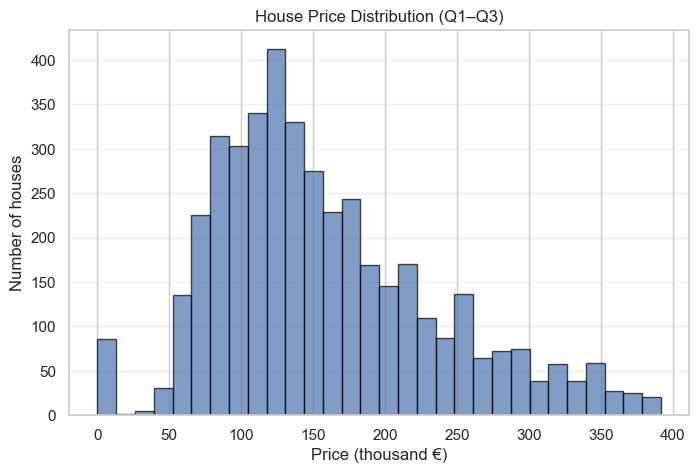

In [8]:
Q1 = df['price_in_euro'].quantile(0.25)
Q3 = df['price_in_euro'].quantile(0.75)
IQR = Q3 - Q1

df_iqr = df[
    (df['price_in_euro'] >= Q1 - 1.5 * IQR) &
    (df['price_in_euro'] <= Q3 + 1.5 * IQR)
]

plt.figure(figsize=(8, 5))

plt.hist(
    df_iqr['price_in_euro'].dropna() / 1000,
    bins=30,
    edgecolor='black',
    alpha=0.7
)

plt.xlabel('Price (thousand €)')
plt.ylabel('Number of houses')
plt.title('House Price Distribution (Q1–Q3)')
plt.grid(axis='y', alpha=0.3)
plt.show()


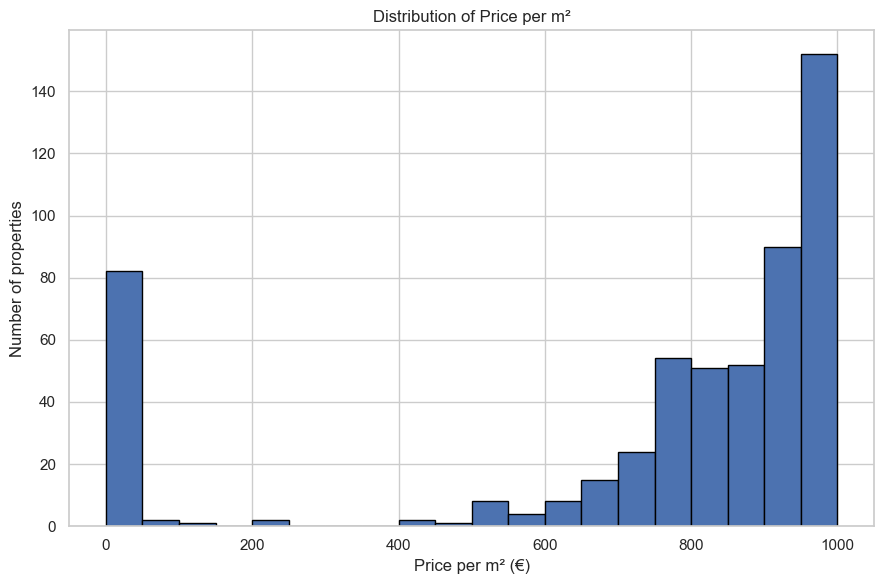

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Clean data
df_plot = df[
    (df['main_property_property_square'] > 0) &
    df['main_property_property_square'].notna() &
    df['price_in_euro'].notna()
].copy()

# Price per square meter
df_plot['price_per_m2'] = (
    df_plot['price_in_euro'] / df_plot['main_property_property_square']
)

# Remove extreme outliers
df_plot = df_plot[df_plot['price_per_m2'] <= 1000]
df_plot = df_plot[df_plot['main_property_property_square'] <= 1000]

# Histogram
plt.figure(figsize=(9, 6))

plt.hist(
    df_plot['price_per_m2'],
    bins=np.arange(0, 1000 + 50, 50),
    edgecolor='black'
)

plt.xlabel('Price per m² (€)')
plt.ylabel('Number of properties')
plt.title('Distribution of Price per m²')

plt.tight_layout()
plt.show()



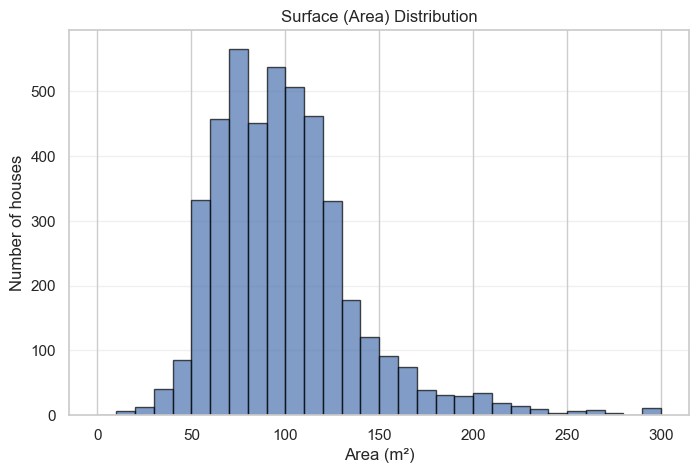

In [10]:

import matplotlib.pyplot as plt
import numpy as np

# Filter the data: Exclude values above 1000
filtered_data = df['main_property_property_square'].dropna()
filtered_data = filtered_data[filtered_data <= 300]

# Define bins with a range of 50
bins = np.arange(0, filtered_data.max() + 10, 10)

# Plot the histogram
plt.figure(figsize=(8, 5))

plt.hist(
    filtered_data,
    bins=bins,
    edgecolor='black',
    alpha=0.7
)

plt.xlabel('Area (m²)')
plt.ylabel('Number of houses')
plt.title('Surface (Area) Distribution')
plt.grid(axis='y', alpha=0.3)

# Set x-axis ticks with a step of 50
xticks = np.arange(0, filtered_data.max() + 50, 50)
plt.xticks(xticks)

plt.show()


“After removing outliers using the interquartile range, the relationship between house area and price becomes clearer. Most properties are concentrated within a narrow area and price range, suggesting a relatively stable market segment.”

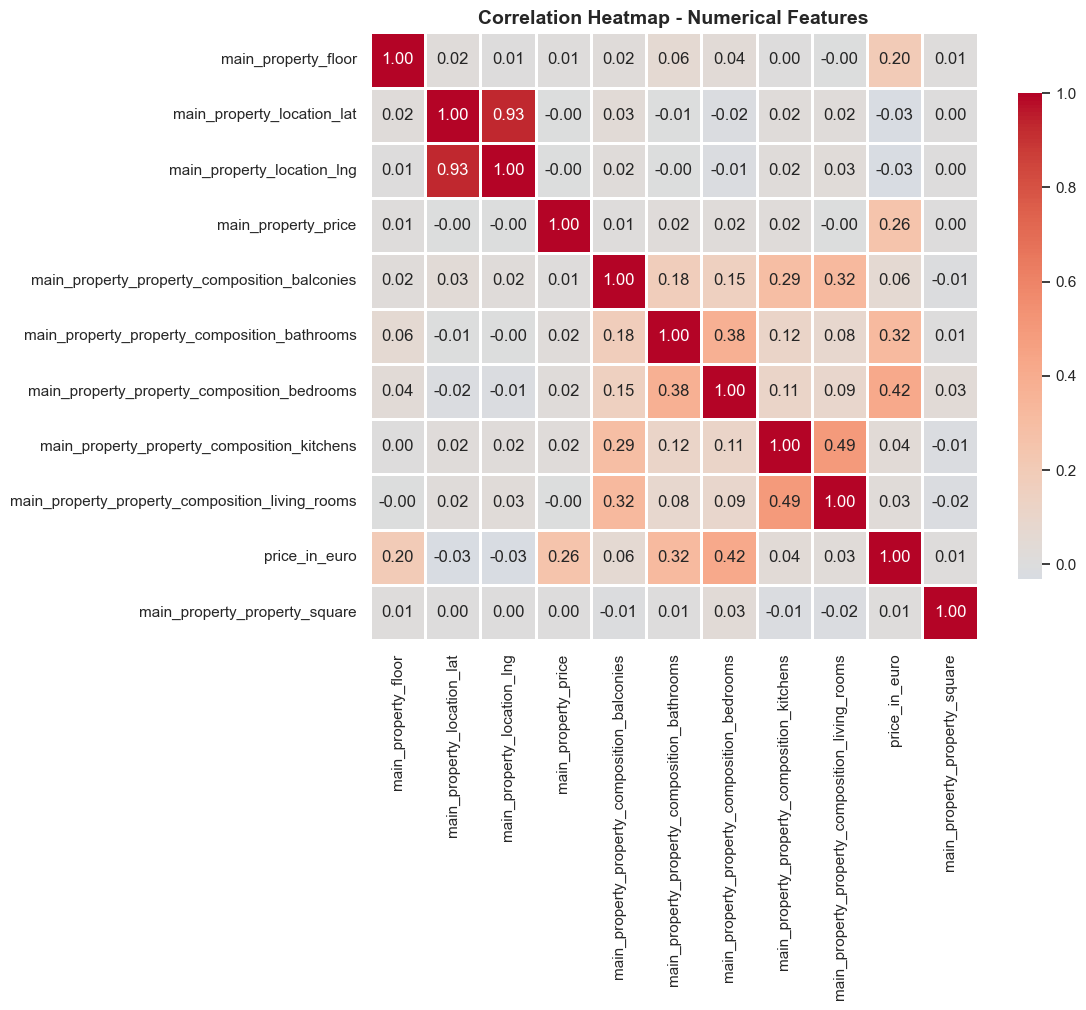

In [11]:
# Create a heatmap showing correlations between numerical features and price
correlation_matrix = df[numerical_cols].corr()

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap - Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Correlation with price
if 'price' in df.columns:
    print("="*60)
    print("CORRELATION WITH PRICE")
    print("="*60)
    price_corr = df[numerical_cols].corr()['price'].sort_values(ascending=False)
    print(price_corr)
    
    # Visualize correlation with price
    plt.figure(figsize=(10, 6))
    price_corr_plot = price_corr.drop('price')
    colors = ['green' if x > 0 else 'red' for x in price_corr_plot.values]
    price_corr_plot.plot(kind='barh', color=colors, edgecolor='black')
    plt.xlabel('Correlation Coefficient')
    plt.title('Feature Correlation with Price')
    plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

CATEGORICAL COLUMNS ANALYSIS

Column: main_property_description_text_content_original_text
main_property_description_text_content_original_text
Disponojme apartament 2+1+Post Parkimi per shitje ne zonen e Stacionit te Trenit\n\nInformacion mbi apartamentin:\n\n• Kati 5 banim\n\n• Sipërfaqe bruto: 92.15 m2\n\n• Sipërfaqe neto: 83.33 m2\n\n• Siperfaqe e perbashket: 8.82m2\n\nOrganizimi:\n\n• Sallon ndenje\n\n• Ambienti i gatimit.\n\n• 2 Dhoma gjumi.\n\n• 1 Tualet me dritare\n\n• 1 ballkon\n\nDetaje te tjera:\n\n• I Sapo perfunduar\n\n• Ndërtim i ri.\n\n•Orientim Jug-Lindje\n\nPër ta vizituar na kontaktoni!\n\n \n\n Cel. : 0697863654\n                                                                                                                                                                                                                                                                                                                                                                        

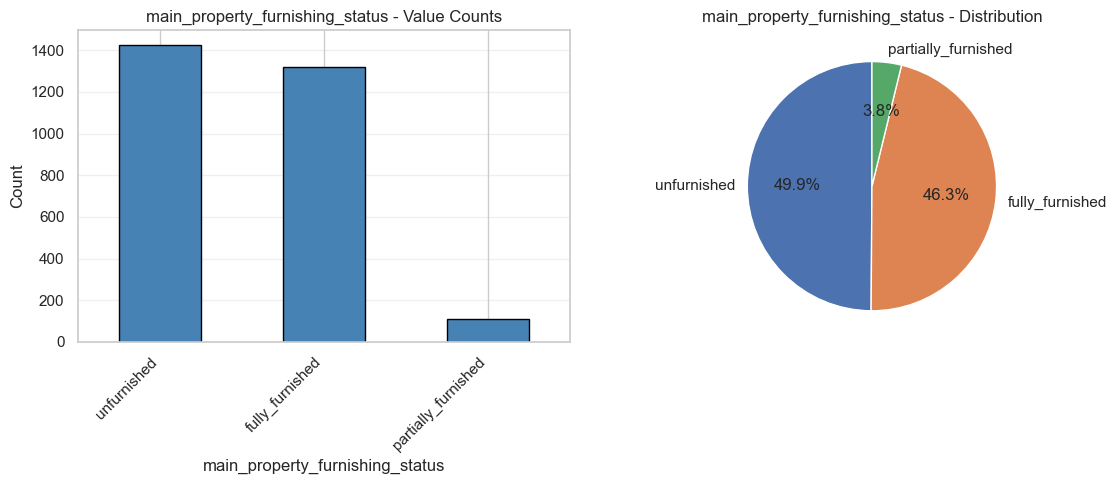


Column: main_property_has_carport
main_property_has_carport
True     210
False     74
Name: count, dtype: int64

Unique values: 2


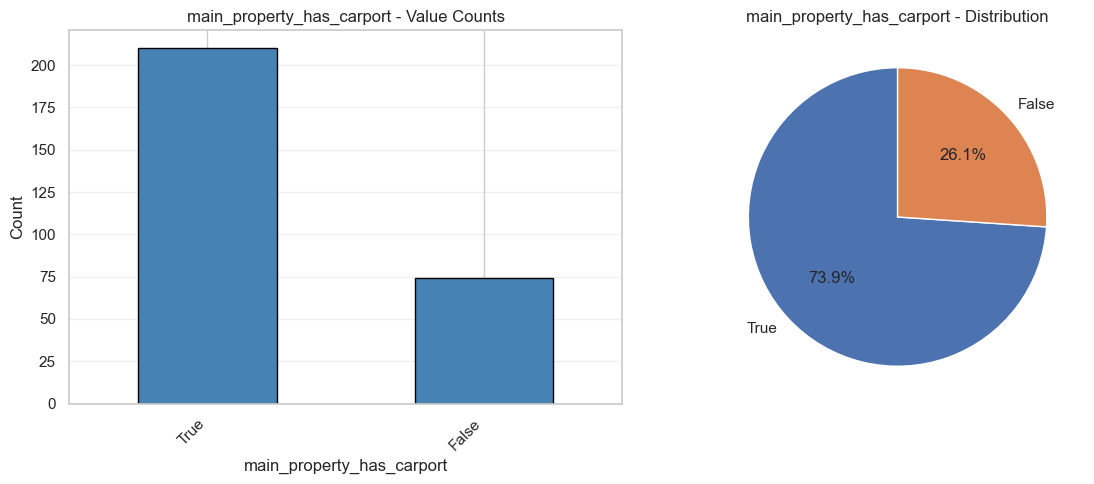


Column: main_property_has_elevator
main_property_has_elevator
True     2549
False     201
Name: count, dtype: int64

Unique values: 2


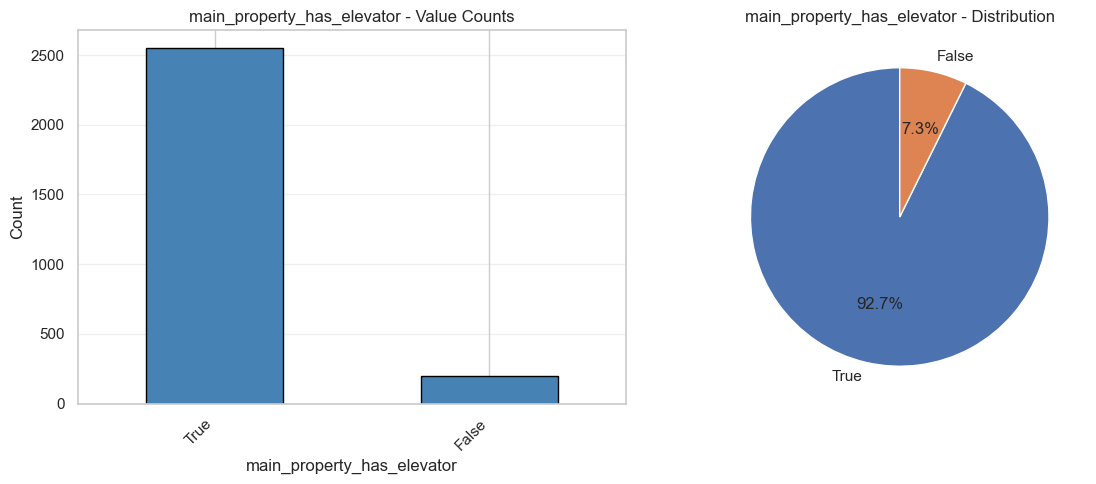


Column: main_property_has_garage
main_property_has_garage
True     248
False    109
Name: count, dtype: int64

Unique values: 2


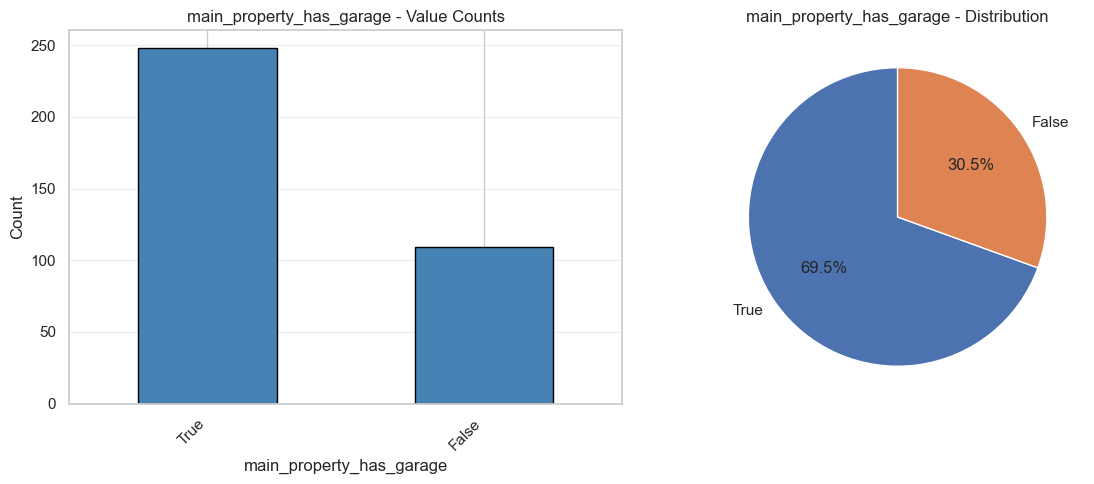


Column: main_property_has_garden
main_property_has_garden
True     94
False    93
Name: count, dtype: int64

Unique values: 2


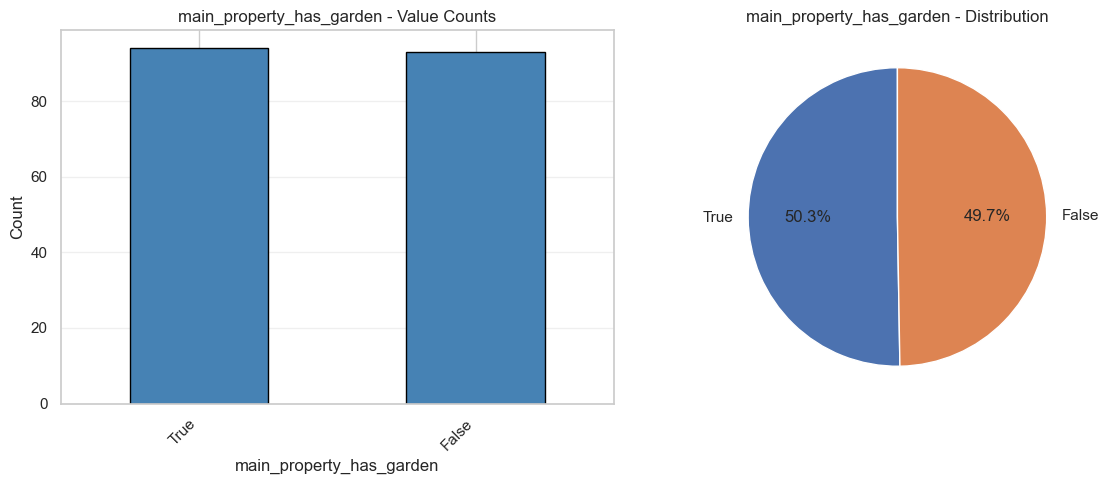


Column: main_property_has_parking_space
main_property_has_parking_space
True     210
False     74
Name: count, dtype: int64

Unique values: 2


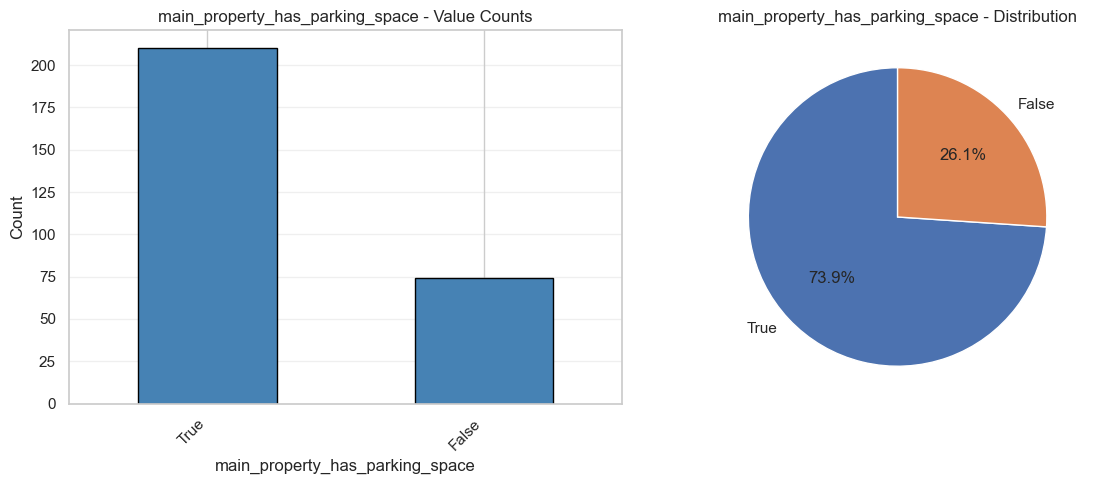


Column: main_property_has_terrace
main_property_has_terrace
True     438
False     70
Name: count, dtype: int64

Unique values: 2


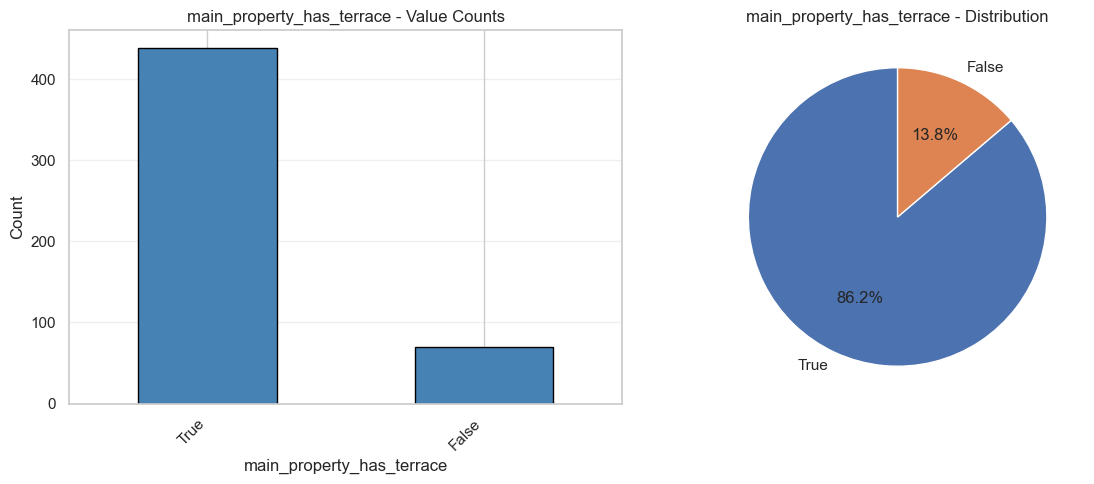


Column: main_property_location_city_zone_city_city_name
main_property_location_city_zone_city_city_name
tirane    4505
Name: count, dtype: int64

Unique values: 1


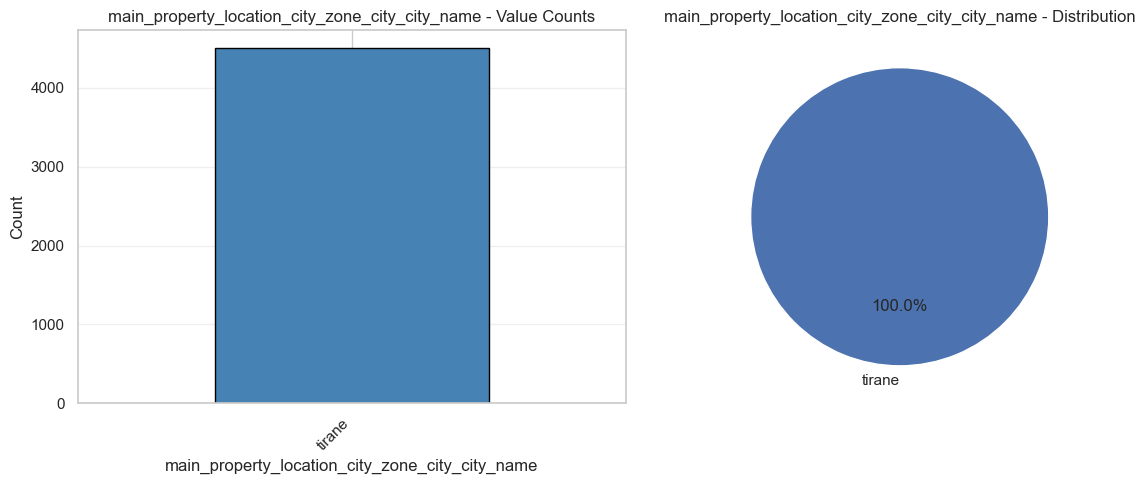


Column: main_property_location_city_zone_formatted_address
main_property_location_city_zone_formatted_address
Tirana, Albania                             177
Rruga Gryka e Kaçanikut, Laknas, Albania    163
Unaza e Re, Tirana, Albania                  92
Astiri, Tirane, Albania                      84
Pazari i Ri, Tirana, Albania                 80
                                           ... 
Kompleksi Square 21, Tirana, Albania          1
Prane restorant Deliu, Tirana, Albania        1
Kompleksi Kontakt, Tirana, Albania            1
Benardin Palja, Tiranë                        1
Rruga Sulo Resuli, Tiranë, Albania            1
Name: count, Length: 667, dtype: int64

Unique values: 667

Column: main_property_price_currency
main_property_price_currency
EUR    4505
Name: count, dtype: int64

Unique values: 1


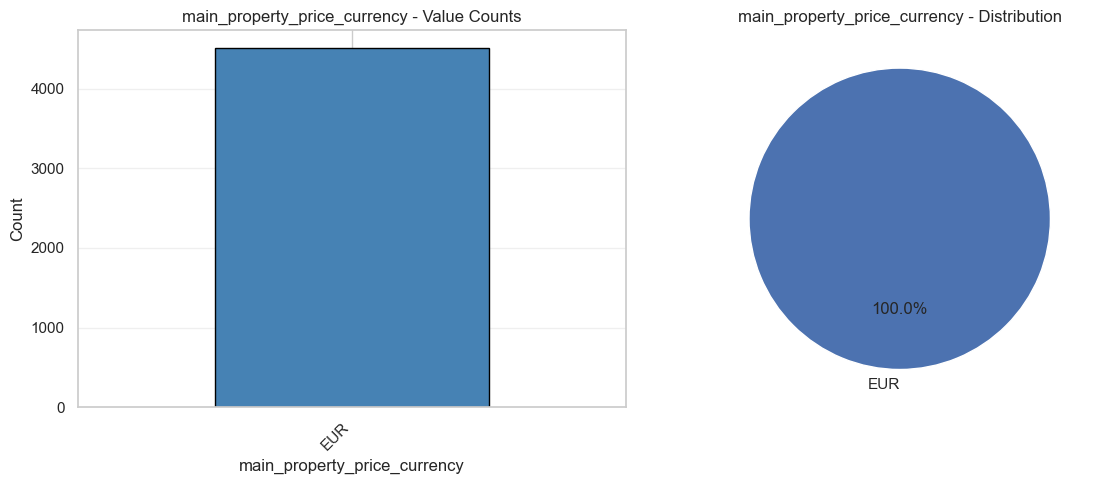


Column: main_property_property_status
main_property_property_status
for_sale    4505
Name: count, dtype: int64

Unique values: 1


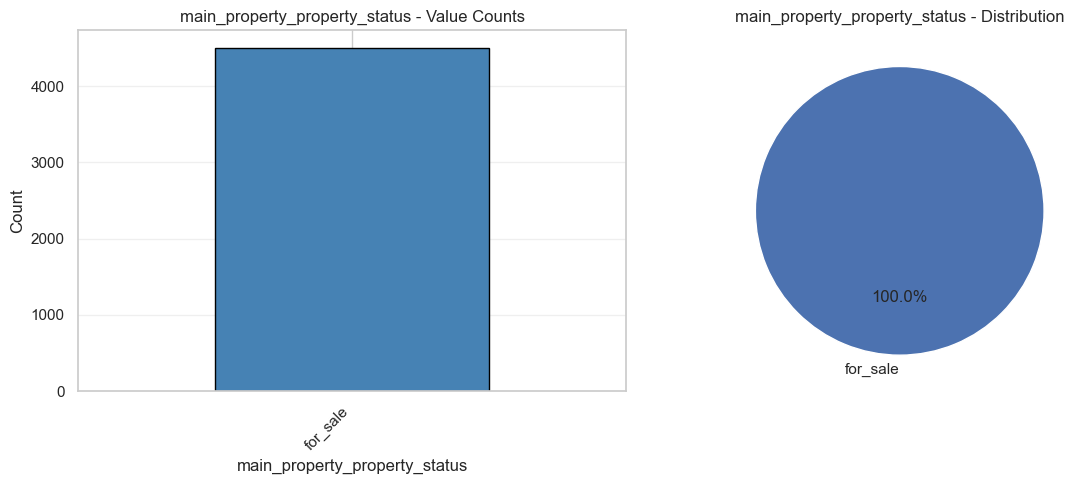


Column: main_property_property_type
main_property_property_type
apartment    4505
Name: count, dtype: int64

Unique values: 1


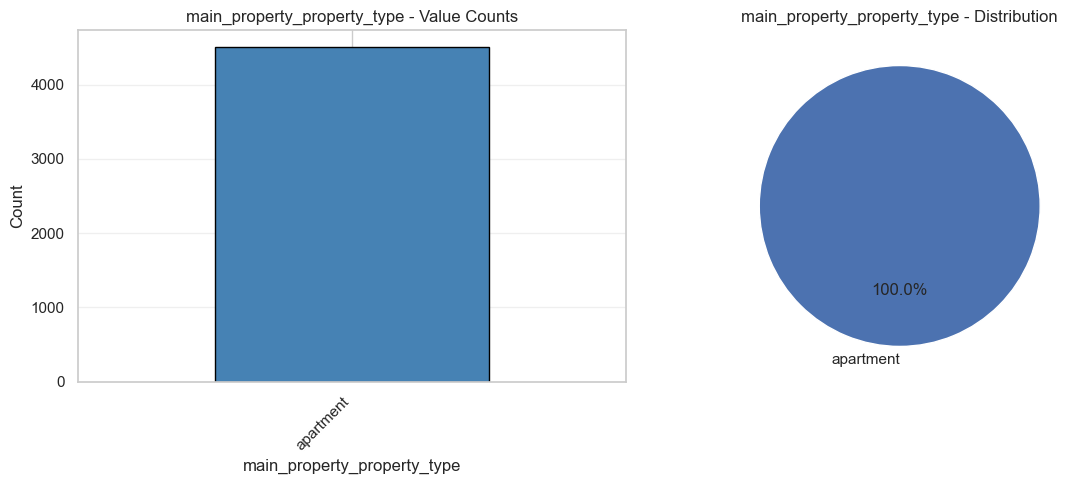

In [12]:
# Analyze all categorical columns with value counts and visualizations
print("="*60)
print("CATEGORICAL COLUMNS ANALYSIS")
print("="*60)

for col in categorical_cols:
    print(f"\n{'='*60}")
    print(f"Column: {col}")
    print(f"{'='*60}")
    
    value_counts = df[col].value_counts()
    print(value_counts)
    print(f"\nUnique values: {df[col].nunique()}")
    
    # Visualize if reasonable number of categories
    if df[col].nunique() <= 20:
        plt.figure(figsize=(12, 5))
        
        # Bar plot
        plt.subplot(1, 2, 1)
        value_counts.plot(kind='bar', color='steelblue', edgecolor='black')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.title(f'{col} - Value Counts')
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', alpha=0.3)
        
        # Pie chart
        plt.subplot(1, 2, 2)
        if len(value_counts) > 10:
            top_10 = value_counts.head(10)
            other = value_counts.iloc[10:].sum()
            plot_data = pd.concat([top_10, pd.Series({'Other': other})])
            plt.pie(plot_data.values, labels=plot_data.index, autopct='%1.1f%%', startangle=90)
            plt.title(f'{col} - Distribution (Top 10 + Other)')
        else:
            plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
            plt.title(f'{col} - Distribution')
        
        plt.tight_layout()
        plt.show()
        
        # If price exists, show price by category
        if 'price' in df.columns:
            plt.figure(figsize=(12, 5))
            df.groupby(col)['price'].mean().sort_values(ascending=False).plot(kind='bar', color='orange', edgecolor='black')
            plt.xlabel(col)
            plt.ylabel('Average Price')
            plt.title(f'Average Price by {col}')
            plt.xticks(rotation=45, ha='right')
            plt.grid(axis='y', alpha=0.3)
            plt.tight_layout()
            plt.show()

CATEGORICAL COLUMNS ANALYSIS

Column: main_property_description_text_content_original_text
main_property_description_text_content_original_text
Disponojme apartament 2+1+Post Parkimi per shitje ne zonen e Stacionit te Trenit\n\nInformacion mbi apartamentin:\n\n• Kati 5 banim\n\n• Sipërfaqe bruto: 92.15 m2\n\n• Sipërfaqe neto: 83.33 m2\n\n• Siperfaqe e perbashket: 8.82m2\n\nOrganizimi:\n\n• Sallon ndenje\n\n• Ambienti i gatimit.\n\n• 2 Dhoma gjumi.\n\n• 1 Tualet me dritare\n\n• 1 ballkon\n\nDetaje te tjera:\n\n• I Sapo perfunduar\n\n• Ndërtim i ri.\n\n•Orientim Jug-Lindje\n\nPër ta vizituar na kontaktoni!\n\n \n\n Cel. : 0697863654\n                                                                                                                                                                                                                                                                                                                                                                        

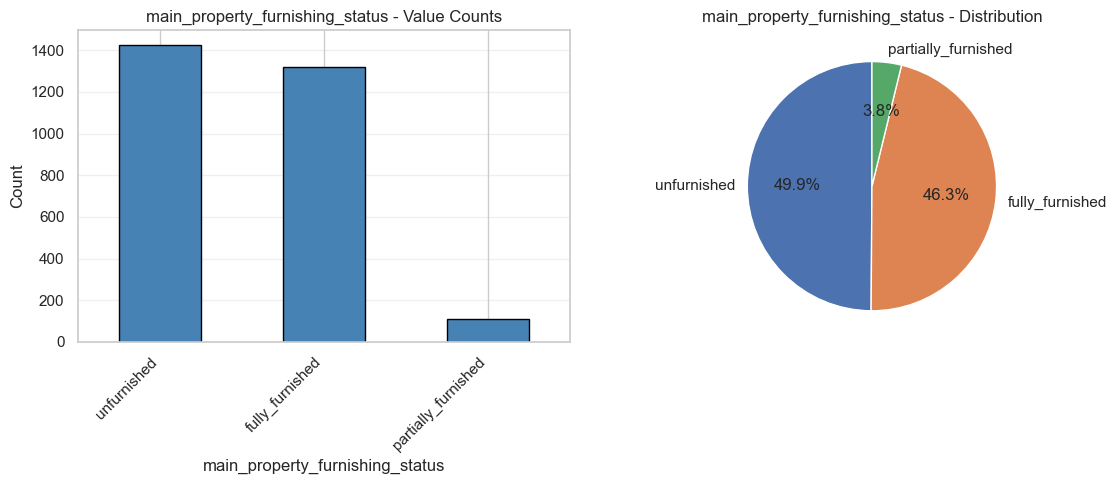


Column: main_property_has_carport
main_property_has_carport
True     210
False     74
Name: count, dtype: int64

Unique values: 2


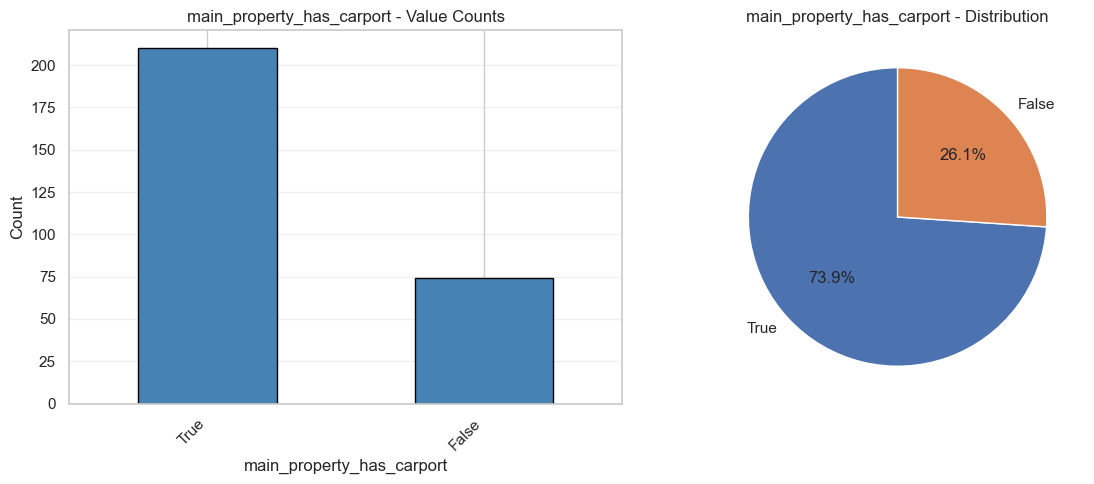


Column: main_property_has_elevator
main_property_has_elevator
True     2549
False     201
Name: count, dtype: int64

Unique values: 2


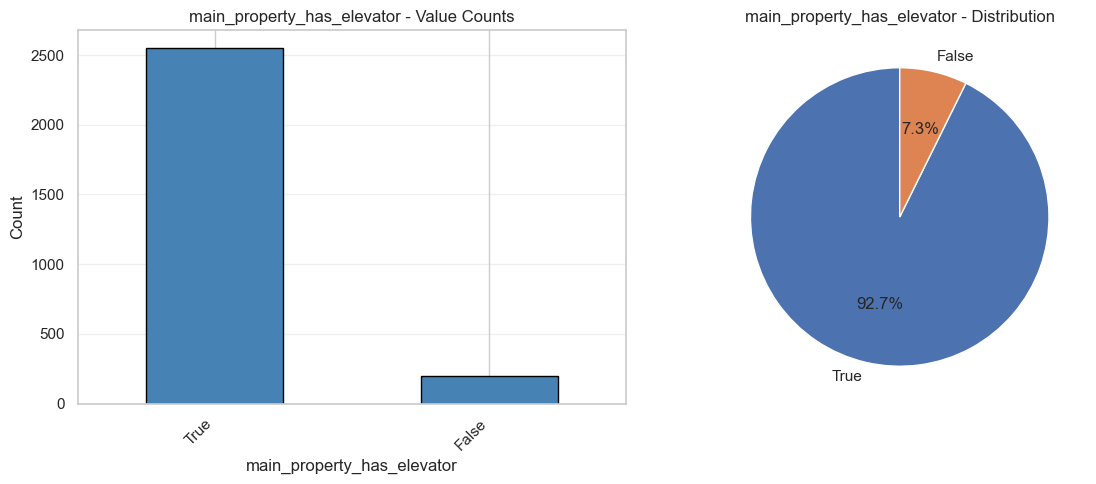


Column: main_property_has_garage
main_property_has_garage
True     248
False    109
Name: count, dtype: int64

Unique values: 2


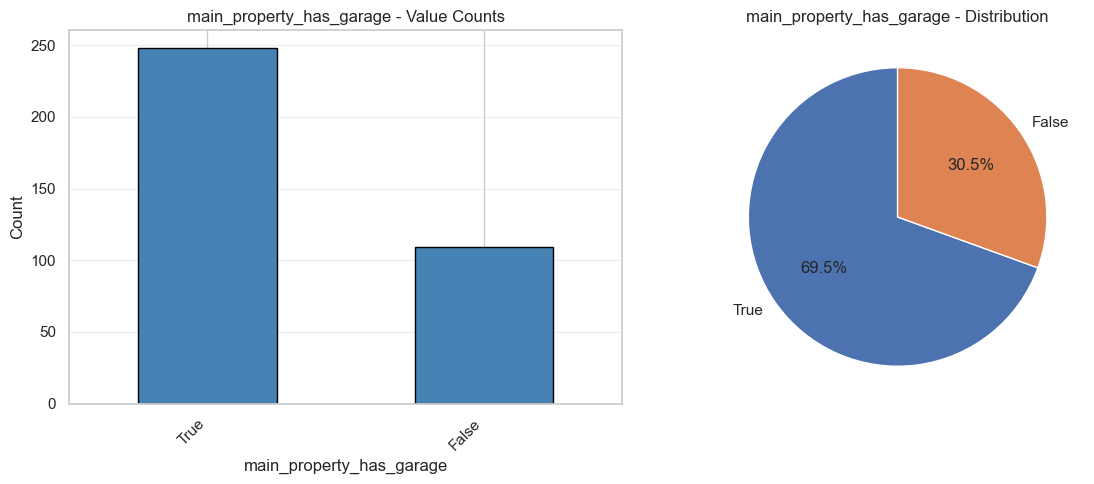


Column: main_property_has_garden
main_property_has_garden
True     94
False    93
Name: count, dtype: int64

Unique values: 2


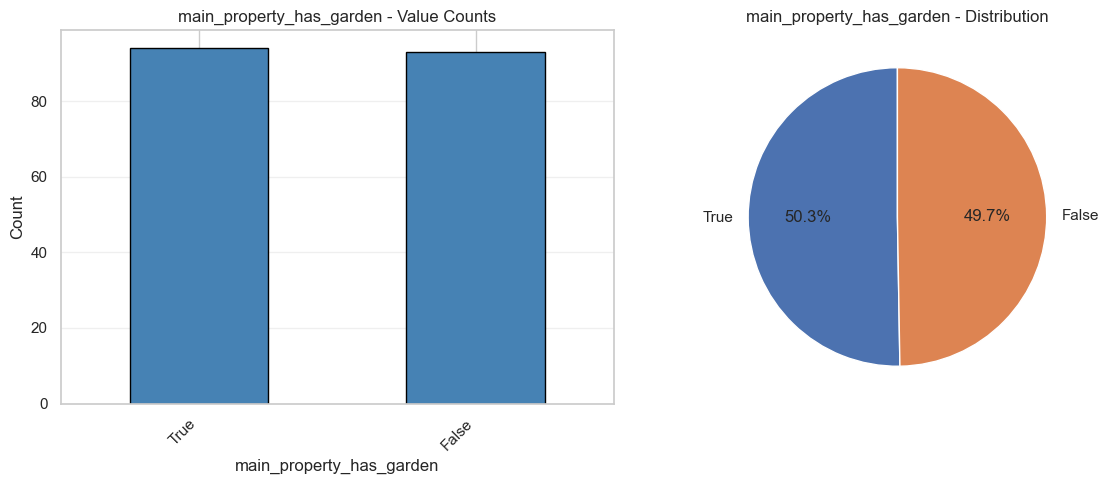


Column: main_property_has_parking_space
main_property_has_parking_space
True     210
False     74
Name: count, dtype: int64

Unique values: 2


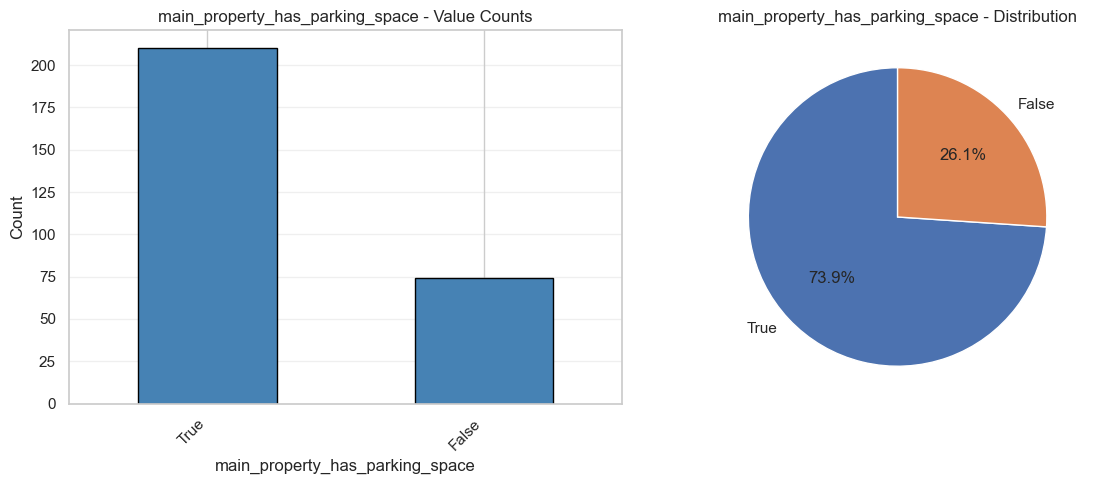


Column: main_property_has_terrace
main_property_has_terrace
True     438
False     70
Name: count, dtype: int64

Unique values: 2


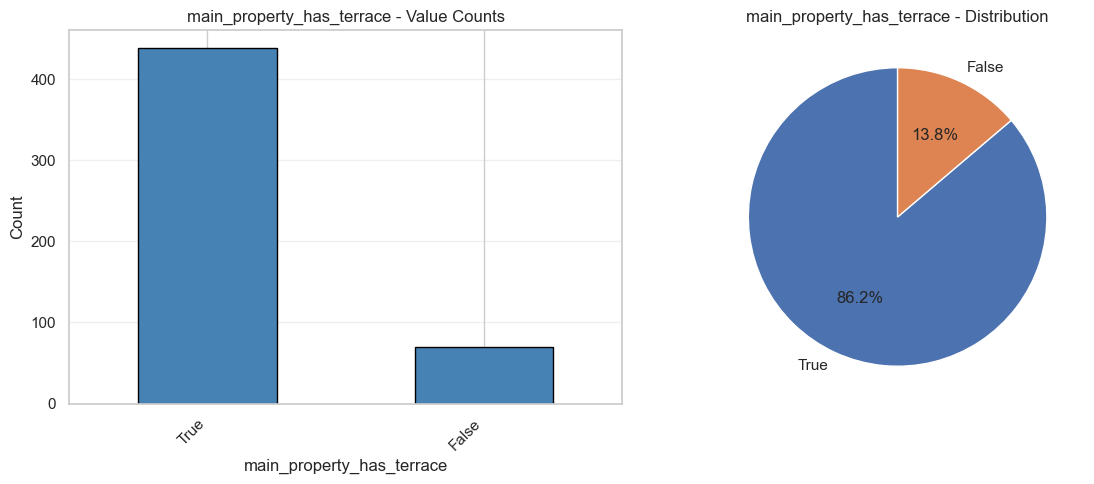


Column: main_property_location_city_zone_city_city_name
main_property_location_city_zone_city_city_name
tirane    4505
Name: count, dtype: int64

Unique values: 1


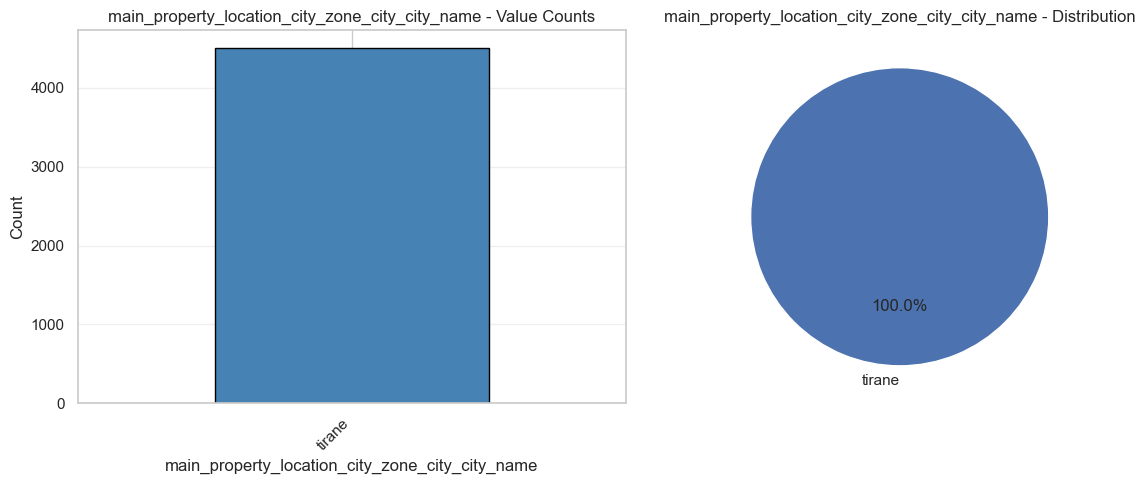


Column: main_property_location_city_zone_formatted_address
main_property_location_city_zone_formatted_address
Tirana, Albania                             177
Rruga Gryka e Kaçanikut, Laknas, Albania    163
Unaza e Re, Tirana, Albania                  92
Astiri, Tirane, Albania                      84
Pazari i Ri, Tirana, Albania                 80
                                           ... 
Kompleksi Square 21, Tirana, Albania          1
Prane restorant Deliu, Tirana, Albania        1
Kompleksi Kontakt, Tirana, Albania            1
Benardin Palja, Tiranë                        1
Rruga Sulo Resuli, Tiranë, Albania            1
Name: count, Length: 667, dtype: int64

Unique values: 667

Column: main_property_price_currency
main_property_price_currency
EUR    4505
Name: count, dtype: int64

Unique values: 1


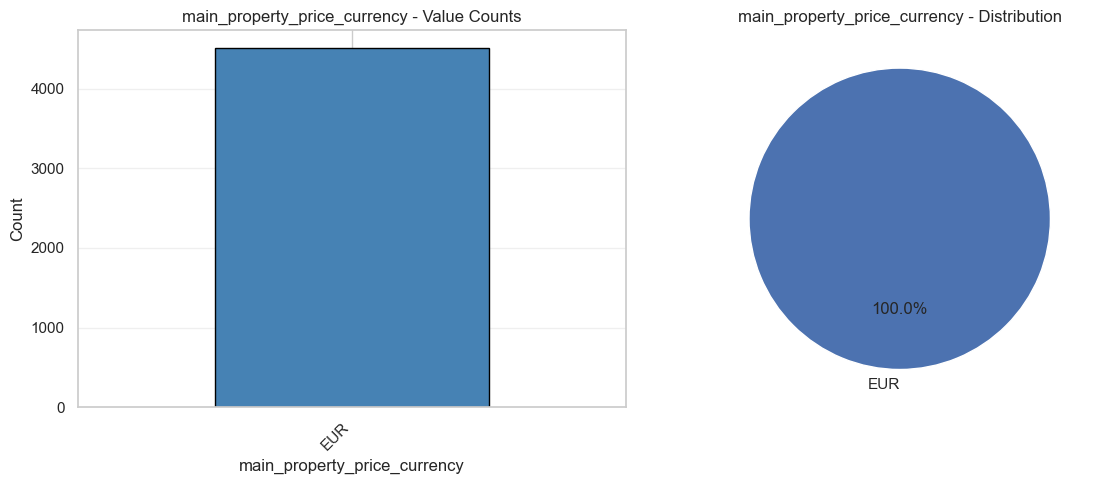


Column: main_property_property_status
main_property_property_status
for_sale    4505
Name: count, dtype: int64

Unique values: 1


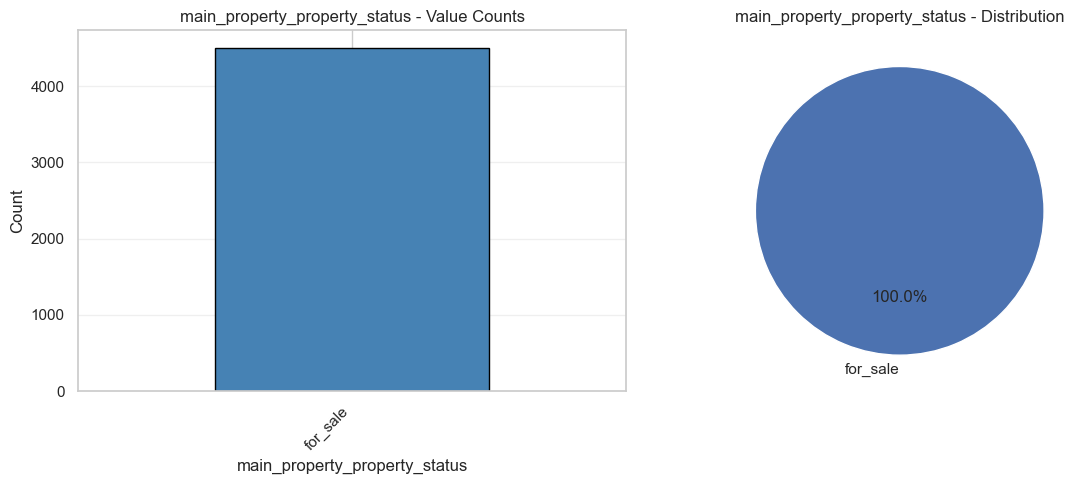


Column: main_property_property_type
main_property_property_type
apartment    4505
Name: count, dtype: int64

Unique values: 1


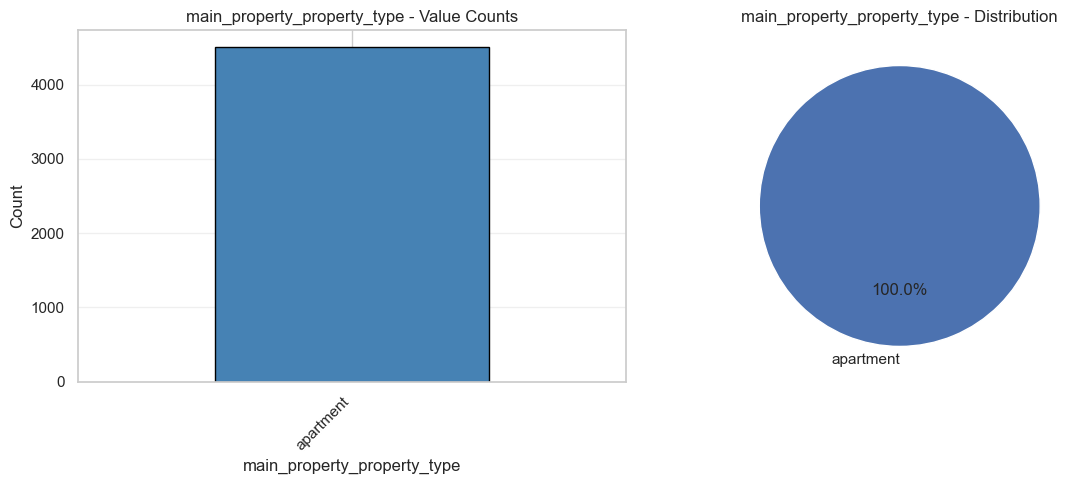

In [13]:
# Analyze all categorical columns with value counts and visualizations
print("="*60)
print("CATEGORICAL COLUMNS ANALYSIS")
print("="*60)

for col in categorical_cols:
    print(f"\n{'='*60}")
    print(f"Column: {col}")
    print(f"{'='*60}")
    
    value_counts = df[col].value_counts()
    print(value_counts)
    print(f"\nUnique values: {df[col].nunique()}")
    
    # Visualize if reasonable number of categories
    if df[col].nunique() <= 20:
        plt.figure(figsize=(12, 5))
        
        # Bar plot
        plt.subplot(1, 2, 1)
        value_counts.plot(kind='bar', color='steelblue', edgecolor='black')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.title(f'{col} - Value Counts')
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', alpha=0.3)
        
        # Pie chart
        plt.subplot(1, 2, 2)
        if len(value_counts) > 10:
            top_10 = value_counts.head(10)
            other = value_counts.iloc[10:].sum()
            plot_data = pd.concat([top_10, pd.Series({'Other': other})])
            plt.pie(plot_data.values, labels=plot_data.index, autopct='%1.1f%%', startangle=90)
            plt.title(f'{col} - Distribution (Top 10 + Other)')
        else:
            plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
            plt.title(f'{col} - Distribution')
        
        plt.tight_layout()
        plt.show()
        
        # If price exists, show price by category
        if 'price' in df.columns:
            plt.figure(figsize=(12, 5))
            df.groupby(col)['price'].mean().sort_values(ascending=False).plot(kind='bar', color='orange', edgecolor='black')
            plt.xlabel(col)
            plt.ylabel('Average Price')
            plt.title(f'Average Price by {col}')
            plt.xticks(rotation=45, ha='right')
            plt.grid(axis='y', alpha=0.3)
            plt.tight_layout()
            plt.show()

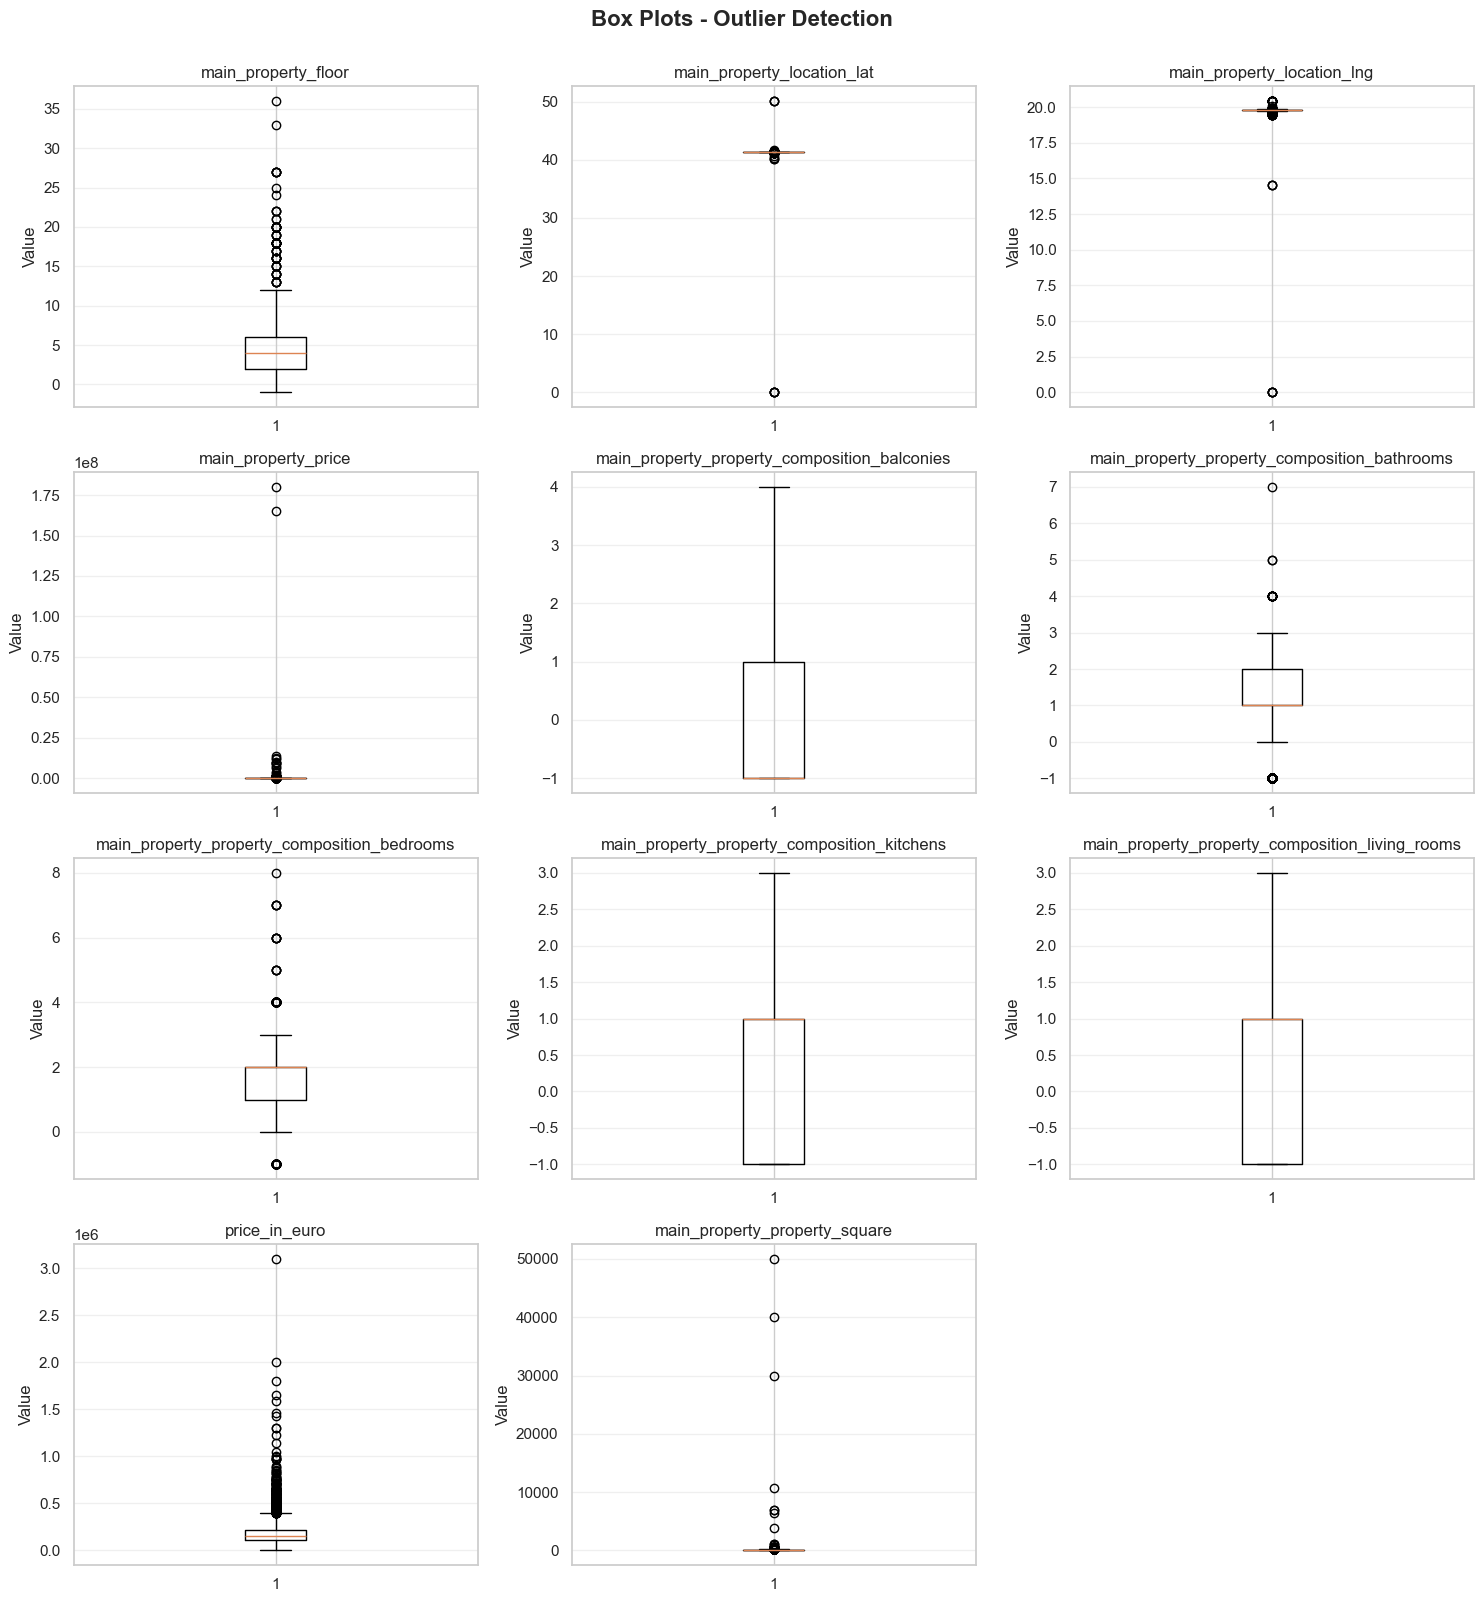

In [14]:
# Visualize outliers for all numerical features using box plots
num_features = len(numerical_cols)
num_cols_plot = 3
num_rows = (num_features + num_cols_plot - 1) // num_cols_plot

fig, axes = plt.subplots(num_rows, num_cols_plot, figsize=(15, num_rows * 4))
axes = axes.flatten() if num_features > 1 else [axes]

for idx, col in enumerate(numerical_cols):
    axes[idx].boxplot(df[col].dropna(), vert=True)
    axes[idx].set_title(f'{col}')
    axes[idx].set_ylabel('Value')
    axes[idx].grid(axis='y', alpha=0.3)

# Hide extra subplots
for idx in range(num_features, len(axes)):
    axes[idx].axis('off')

plt.suptitle('Box Plots - Outlier Detection', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

In [15]:
# Remove outliers from the dataset using the IQR method
print("="*60)
print("REMOVING OUTLIERS")
print("="*60)

df_original = df.copy()
print(f"Original dataset size: {len(df_original)}")

# Remove outliers for each numerical column
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Keep only rows within bounds
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print(f"Dataset size after removing outliers: {len(df)}")
print(f"Rows removed: {len(df_original) - len(df)} ({((len(df_original) - len(df)) / len(df_original) * 100):.2f}%)")
print(f"Rows retained: {len(df)} ({(len(df) / len(df_original) * 100):.2f}%)")

REMOVING OUTLIERS
Original dataset size: 4505
Dataset size after removing outliers: 3258
Rows removed: 1247 (27.68%)
Rows retained: 3258 (72.32%)


In [16]:
# Summary of the cleaned dataset ready for model training
print("="*60)
print("FINAL DATASET SUMMARY")
print("="*60)

print(f"\nDataset shape: {df.shape}")
print(f"Total samples: {df.shape[0]}")
print(f"Total features: {df.shape[1]}")

print(f"\nNumerical features ({len(numerical_cols)}):")
for col in numerical_cols:
    if col in df.columns:
        print(f"  - {col}: {df[col].dtype}")

print(f"\nCategorical features ({len(categorical_cols)}):")
for col in categorical_cols:
    if col in df.columns:
        print(f"  - {col}: {df[col].nunique()} unique values")

print(f"\nMissing values: {df.isnull().sum().sum()}")

print("\n" + "="*60)
print("Statistical Summary of Cleaned Data:")
print("="*60)
print(df.describe())

FINAL DATASET SUMMARY

Dataset shape: (3258, 25)
Total samples: 3258
Total features: 25

Numerical features (11):
  - main_property_floor: float64
  - main_property_location_lat: float64
  - main_property_location_lng: float64
  - main_property_price: float64
  - main_property_property_composition_balconies: float64
  - main_property_property_composition_bathrooms: float64
  - main_property_property_composition_bedrooms: float64
  - main_property_property_composition_kitchens: float64
  - main_property_property_composition_living_rooms: float64
  - price_in_euro: float64
  - main_property_property_square: float64

Categorical features (13):
  - main_property_description_text_content_original_text: 3206 unique values
  - main_property_furnishing_status: 3 unique values
  - main_property_has_carport: 2 unique values
  - main_property_has_elevator: 2 unique values
  - main_property_has_garage: 2 unique values
  - main_property_has_garden: 2 unique values
  - main_property_has_parking_spac

In [17]:
# Document all features for ML model preparation
print("="*60)
print("FEATURE DESCRIPTIONS FOR MODEL TRAINING")
print("="*60)

feature_info = pd.DataFrame({
    'Feature': df.columns,
    'Type': df.dtypes.values,
    'Non_Null_Count': df.count().values,
    'Unique_Values': [df[col].nunique() for col in df.columns],
    'Missing_Values': df.isnull().sum().values
})

print(feature_info.to_string(index=False))

print("\n" + "="*60)
print("READY FOR MODEL TRAINING")
print("="*60)
print("✓ Data preprocessing completed")
print("✓ Outliers removed")
print("✓ Features analyzed and described")
print("\nNext steps:")
print("1. Feature Engineering (if needed)")
print("2. Encode categorical variables")
print("3. Split data into train/test sets")
print("4. Apply models: Random Forest, XGBoost, Linear Regression")

FEATURE DESCRIPTIONS FOR MODEL TRAINING
                                             Feature     Type  Non_Null_Count  Unique_Values  Missing_Values
main_property_description_text_content_original_text   object            3258           3206               0
                                 main_property_floor  float64            3258             14               0
                     main_property_furnishing_status   object            2188              3            1070
                           main_property_has_carport   object             186              2            3072
                          main_property_has_elevator   object            2108              2            1150
                            main_property_has_garage   object             223              2            3035
                            main_property_has_garden   object             113              2            3145
                     main_property_has_parking_space   object             186           

In [18]:
# Save the cleaned dataset for use in model training
# Uncomment the line below to save
# df.to_csv('house_price_cleaned.csv', index=False)
# df.to_json('house_price_cleaned.json', orient='records')

print("="*60)
print("DATASET SAVE OPTIONS")
print("="*60)
print("To save the cleaned dataset, uncomment:")
print("  df.to_csv('house_price_cleaned.csv', index=False)")
print("  df.to_json('house_price_cleaned.json', orient='records')")
print("\n✓ Analysis complete! Ready for modeling.")

DATASET SAVE OPTIONS
To save the cleaned dataset, uncomment:
  df.to_csv('house_price_cleaned.csv', index=False)
  df.to_json('house_price_cleaned.json', orient='records')

✓ Analysis complete! Ready for modeling.


Feature Engineering 

In [28]:
# ================================
# Feature Engineering
# ================================

# 1️⃣ Price-related features (already computed)
df['price_per_m2'] = df['price_in_euro'] / df['main_property_property_square']
df['log_price'] = np.log1p(df['price_in_euro'])
df['log_area'] = np.log1p(df['main_property_property_square'])
df['log_price_per_m2'] = np.log1p(df['price_per_m2'])

# 2️⃣ Encode property status
status_map = {
    'new': 3,
    'used': 2,
    'under construction': 1
}
df['status_encoded'] = df['main_property_property_status'].map(status_map).fillna(0)

# 3️⃣ Encode property type (one-hot)
df = pd.get_dummies(df, columns=['main_property_property_type'], prefix='type', drop_first=True)

# 4️⃣ Combine composition features
composition_cols = [
    'main_property_property_composition_bedrooms',
    'main_property_property_composition_living_rooms',
    'main_property_property_composition_kitchens',
    'main_property_property_composition_bathrooms'
]

# Fill missing composition values with 0
df[composition_cols] = df[composition_cols].fillna(0)

df['total_rooms'] = df[composition_cols].sum(axis=1)
df['total_features'] = df['total_rooms'] + df['main_property_property_composition_balconies'].fillna(0)

# 5️⃣ Combine boolean amenities into one feature
amenity_cols = [
    'main_property_has_carport',
    'main_property_has_elevator',
    'main_property_has_garage',
    'main_property_has_garden',
    'main_property_has_parking_space',
    'main_property_has_terrace'
]

# Convert to int (if not already)
df[amenity_cols] = df[amenity_cols].astype(int)

df['total_amenities'] = df[amenity_cols].sum(axis=1)

# 6️⃣ Location features
# Latitude and longitude are already numeric
# Encode city/zone as categorical (one-hot)
df = pd.get_dummies(
    df, 
    columns=['main_property_location_city_zone_city_city_name'], 
    prefix='zone', 
    drop_first=True
)

# 7️⃣ Optional: property age if year built exists
# df['property_age'] = 2025 - df['year_built']

# 8️⃣ Fill remaining numeric missing values
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(0)

print("Feature Engineering Completed!")


KeyError: "None of [Index(['main_property_property_type'], dtype='object')] are in the [columns]"

In [29]:
print('main_property_property_type' in df.columns)


False


Price per m²
Already calculated, keep it.

Summary of Engineered Features

You now have:

Binary amenities (garage, elevator, garden)

Floor & floor category

Room ratios & totals

Location clusters

Encoded city & property types

Size categories

In [ ]:
MODEL Training


In [ ]:
1️⃣ Data Preparation

In [ ]:
from sklearn.model_selection import train_test_split

# Target
y = df['price_in_euro']

# Features (exclude target and raw columns you don't want)
# Train-test split
cols_to_drop = ['price_in_euro', 'log_price', 'price_per_m2']
cols_to_drop = [col for col in cols_to_drop if col in df.columns]  # keep only existing columns

X = df.drop(columns=cols_to_drop)
y = df['price_in_euro']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


1️⃣ Import models

In [ ]:
ls
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


2️⃣ Initialize models


In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    # "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    # "LightGBM": LGBMRegressor(n_estimators=100, random_state=42)
}


3️⃣ Train models and make predictions


In [ ]:
predictions = {}  # store predictions for evaluation

for name, model in models.items():
    # Train
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    predictions[name] = y_pred
    
    print(f"{name} trained successfully!")

4️⃣ Store results in a DataFrame (optional)


In [ ]:
results_df = pd.DataFrame({
    "Actual": y_test
})

for name, y_pred in predictions.items():
    results_df[name + "_Pred"] = y_pred

results_df.head()